<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/04_KNN_Regresi%C3%B3n_y_Ajuste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de k-vecinos más cercanos (KNN)

Este módulo retomamos el modelos vistos en el notebook anterior, es un buen punto de partida en aprendizaje supervisado porque es intuitivo y es fácil de interpretar, puede usarse tanto para clasificación como para regresión.

En clasificación, el algoritmo de k-vecinos más cercanos funciona de forma muy directa, memoriza todo el conjunto de entrenamiento, para una nueva instancia encuentra los k puntos más cercanos y obtiene sus etiquetas, predice la clase por mayoría de votos. No aprende una función explícita, sino que consulta los datos de entrenamiento cada vez que predice.

## Clasificación


### Dataset y recursos

In [16]:
%matplotlib notebook
%matplotlib inline

from sklearn import neighbors
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()

# Para regresión

from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,random_state=0)

### **Regiones de decisión y complejidad del modelo**


Cuando se usa k = 1, cada punto de entrenamiento define su propia región, el límite de decisión es muy irregular, el modelo tiene alta varianza, se ajusta perfectamente a los datos de entrenamiento

Este es un ejemplo claro de sobreajuste: el modelo memoriza los datos pero ignora la tendencia global entre las clases.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


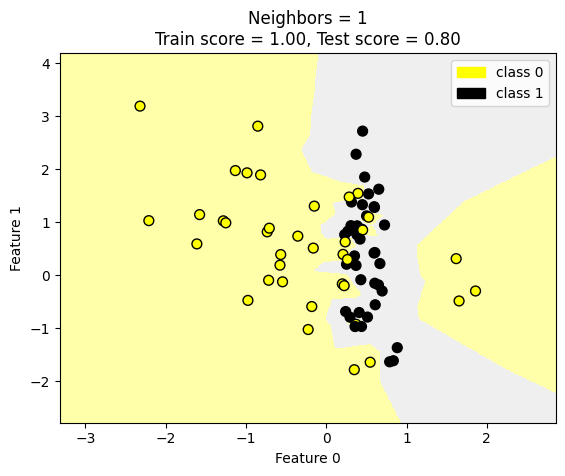

In [12]:
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)

Al aumentar el valor de k (por ejemplo, k = 11), cada punto individual tiene menos influencia, los límites de decisión se vuelven más suaves, el modelo es menos complejo, disminuye la varianza y si k llega a ser tan grande como el número total de puntos, el modelo siempre predice la clase más frecuente y el modelo se vuelve demasiado simple

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


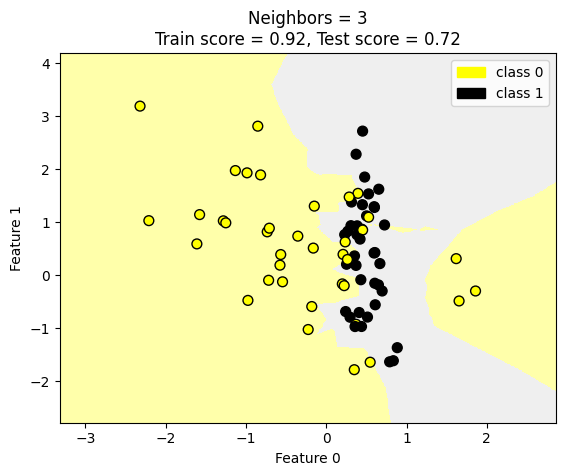

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


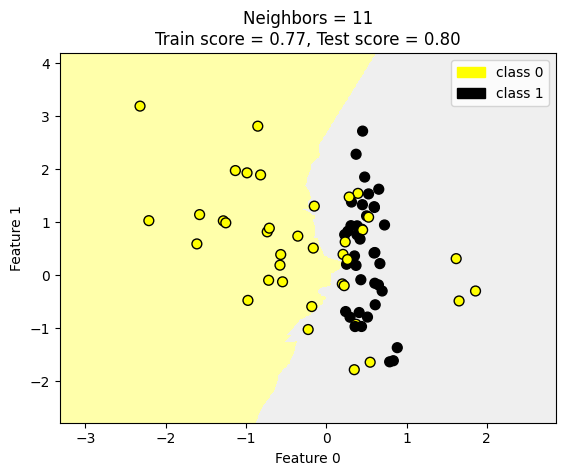

In [13]:
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

El comportamiento típico observado es:

si k es pequeño, el puntaje de entrenamiento muy alto y Puntaje de prueba bajo

k intermedio, Menor ajuste al entrenamiento y Mejor desempeño en prueba

k muy grande, Mal desempeño tanto en entrenamiento como en prueba

Esto ilustra claramente el compromiso entre complejidad del modelo y generalización.

## Regresión


El mismo enfoque se puede aplicar a regresión, con una diferencia clave, trabaja en tiempo discreto, por lo que no hay votos por clase, se promedian los valores objetivo de los k vecinos más cercanos y para un punto de consulta se buscan los k valores de x más cercanos, se promedian sus valores de y ese promedio es la predicción.

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

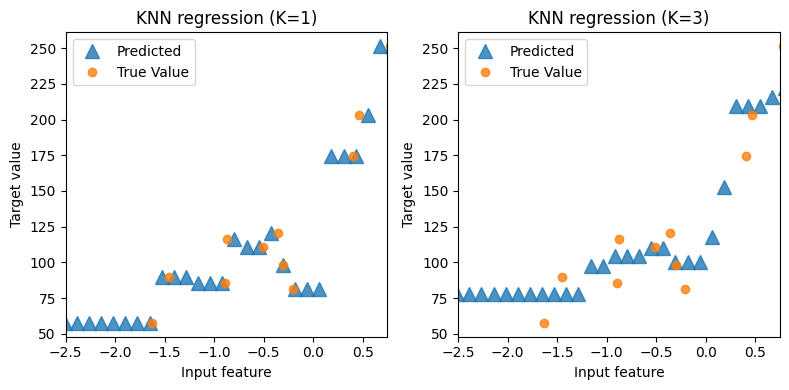

In [19]:
import numpy as np

fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

Ejemplo: si tenemos un feature = -1.0, en k=1 lo pondrá en menos de 100, mientras que para k = 3, se pondra por encima de 100 el valor a predecir.

**KNN para clasificación**

El objetivo es discreto (clases), ejemplo: {0, 1}, {manzana, naranja}, {spam, no spam}, predice mirando las etiquetas de clase de los k vecinos y la clase por mayoría de votos

**KNN para regresión**

El objetivo es continuo, ejemplo: precio, temperatura, edad, tasa de crimen, predice mirando los valores numéricos de los k vecinos y el promedio (u otra agregación) de esos valores

## **Evaluación en regresión: R²**



Para evaluar modelos de regresión se usa el coeficiente de determinación (R²), con R² = 1 → predicciones perfectas y R² = 0 → modelo que siempre predice el valor promedio, valores más altos indican mejor ajuste

Se observa el mismo patrón que en clasificación:

R² entrenamiento ↓ cuando k ↑

R² prueba ↑ hasta un punto óptimo

Luego ambos ↓ por subajuste

In [20]:
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 92.08008673 208.91628903  92.08008673 220.33930256 104.68592819]
R-squared test score: -0.135


**Visualización y evaluación del modelo KNN de regresión**

En esta parte se visualiza el comportamiento del modelo de regresión k-vecinos más cercanos y se evalúa su desempeño tanto en el conjunto de entrenamiento como en el de prueba.

Para cada valor de $k$ Se calcula el coeficiente de determinación $R^2$
 sobre los datos de entrenamiento y de prueba.

Se grafica la función de predicción del modelo sobre un rango continuo de valores de la variable de entrada. Se superponen los puntos de entrenamiento y prueba para comparar visualmente el ajuste del modelo con los datos reales.

La curva azul representa la predicción del modelo KNN para cada valor de entrada, mientras que los puntos circulares corresponden a los datos de entrenamiento, los triángulos corresponden a los datos de prueba


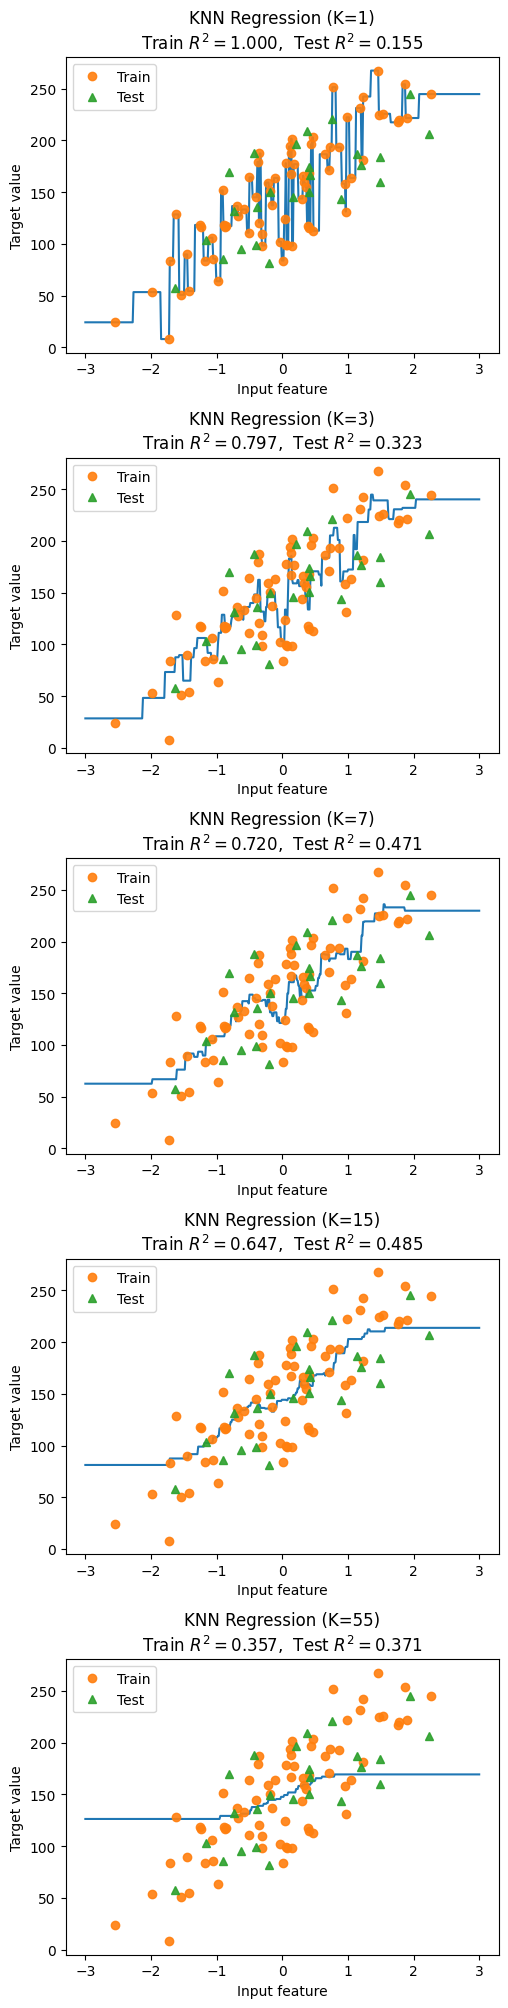

In [21]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
